# Interactive plots

Interactive plots are dynamic visualizations that allow users to engage with the data by zooming, panning, hovering over data points for more details, filtering, and more. These features make data exploration more intuitive and insightful. Below are some key points about interactive plots, their uses, potential pitfalls, and how to create them using popular Python libraries.

### Why and When to Use Interactive Plots:

1. **Enhanced Data Exploration:**
   - Users can interact with the data, making it easier to discover trends, outliers, and patterns that might not be immediately visible in static plots.

2. **User Engagement:**
   - Interactive plots are more engaging and can provide a better user experience, especially for presentations or web applications.

3. **Complex Data Representation:**
   - When dealing with large or complex datasets, interactive plots can help manage the information overload by allowing users to focus on specific parts of the data.

4. **Detailed Analysis:**
   - Users can drill down into the data to get detailed views, which is useful for data analysis and decision-making processes.

### Potential Pitfalls and Mitigation:

1. **Performance Issues:**
   - **Pitfall:** Interactive plots with large datasets can be slow and unresponsive.
   - **Mitigation:** Use data aggregation or sampling techniques to reduce the amount of data being visualized at one time. Optimize the code and use efficient libraries.

2. **Overcomplication:**
   - **Pitfall:** Adding too many interactive features can make the plot cluttered and confusing.
   - **Mitigation:** Keep the interactions simple and intuitive. Provide clear instructions or tooltips to guide users.

3. **Browser Compatibility:**
   - **Pitfall:** Some interactive features might not work consistently across different browsers.
   - **Mitigation:** Test the interactive plots on multiple browsers and use libraries that support cross-browser functionality.

4. **Accessibility:**
   - **Pitfall:** Interactive plots might not be accessible to users with disabilities.
   - **Mitigation:** Ensure that the visualizations are accessible by following best practices, such as providing keyboard navigation and screen reader support.

### Best Practices:

1. **Simplicity:**
   - Keep the interactive elements straightforward to ensure usability.

2. **Responsiveness:**
   - Ensure that the interactive plot is responsive and performs well on different devices and screen sizes.

3. **Guidance:**
   - Provide tooltips, legends, and instructions to help users understand how to interact with the plot.

4. **Accessibility:**
   - Follow accessibility guidelines to make the plots usable for all users, including those with disabilities.

Interactive plots can significantly enhance the data analysis process by making it easier to explore and understand complex datasets. Using libraries like Plotly and Bokeh, you can create powerful interactive visualizations tailored to your specific needs.

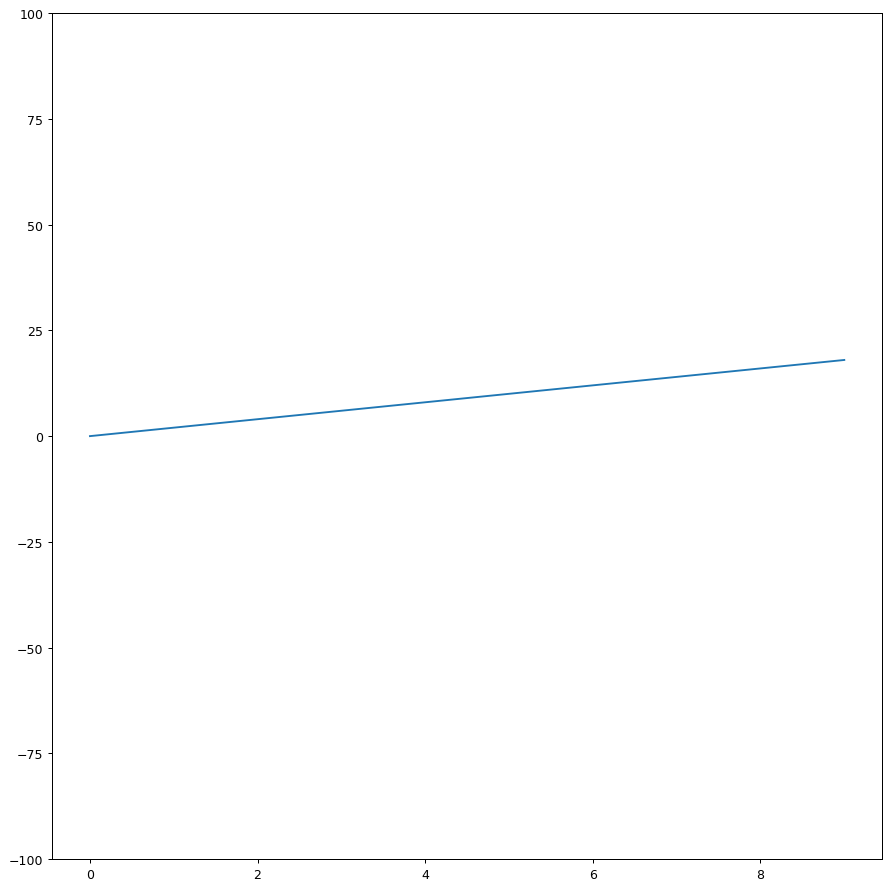

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact,fixed,interact_manual

fig,(ax1)= plt.subplots(figsize=(10,10),dpi=90)

fig.set(tight_layout=True)

# creating a linear func
def f(x):
    ax1.plot(np.arange(0,10),x * np.arange(0,10))
    ax1.set_ylim(-100,100)

f(2)


In [114]:
# define the function again
def f(x,z):
    plt.subplots(figsize=(10,10),dpi=90)
    plt.clf() #clears current figure
    plt.plot(np.arange(z,10), x*np.arange(z,10))
    plt.ylim(-100,100)
    plt.title("Interactive plot - Linear function")

# widget for selecting the value of x and then calling the function again to draw the plot using the new value
interact(f,x=(-5,10,1),z=(-5,10,1));

interactive(children=(IntSlider(value=2, description='x', max=10, min=-5), IntSlider(value=2, description='z',…

In [115]:
import plotly.express as px

# Sample data
df = px.data.iris()

# Create an interactive scatter plot
fig = px.scatter(
    df, x='sepal_width', y='sepal_length',
    color='species', size='petal_length',
    hover_data=['petal_width']
)

# Show the plot
fig.show()


In [116]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import HoverTool
from bokeh.sampledata.iris import flowers
# Output to a static HTML file
output_file("interactive_plot.html")
# Create a new plot with a title and axis labels
plot = figure(title="Iris Morphology", x_axis_label='Petal Length', y_axis_label='Petal Width')
# Add a hover tool
hover = HoverTool()
hover.tooltips = [
    ("Species", "@species"),
    ("Sepal Width", "@sepal_width"),
    ("Sepal Length", "@sepal_length")
]
plot.add_tools(hover)
# Add circle renderer
plot.scatter(flowers["petal_length"], flowers["petal_width"], size=10, color="red", alpha=0.5)
# Show the plot
show(plot)